In [1]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
veriseti={"ilan no":[8611,7885,8607,7765,8601,8708],
         "emlak tipi":["satılık müstakil ev","satılık daire","satılık daire","satılık villa","satılık daire","satılık daire"],
         "il":["istanbul","istanbul","ankara","istanbul","izmir","istanbul"],
         "ilçe":["kadıköy","ataşehir","çankaya","kadıköy","bornova","beyoğlu"],
         "fiyat":[1690000,1200000,795000,1345000,468000,1200000],
         "oda":[3,5,3,2,3,3],
         "banyo":[1,2,1,1,1,2],
         "kat":[8,8,4,3,2,5],
         "ısıtma":["merkezi","doğalgaz","doğalgaz","merkezi","doğalgaz","doğalgaz"],
         "m2":[110,250,115,100,130,120]}  
df=pd.DataFrame(veriseti)
df

,ilan no,emlak tipi,il,ilçe,fiyat,oda,banyo,kat,ısıtma,m2
0,8611,satılık müstakil ev,istanbul,kadıköy,1690000,3,1,8,merkezi,110
1,7885,satılık daire,istanbul,ataşehir,1200000,5,2,8,doğalgaz,250
2,8607,satılık daire,ankara,çankaya,795000,3,1,4,doğalgaz,115
3,7765,satılık villa,istanbul,kadıköy,1345000,2,1,3,merkezi,100
4,8601,satılık daire,izmir,bornova,468000,3,1,2,doğalgaz,130
5,8708,satılık daire,istanbul,beyoğlu,1200000,3,2,5,doğalgaz,120


In [3]:
#Feauture tipleri: 
#emlak tipi:categorical - nominal,il:categorical - nominal,ilçe:categorical - nominal,ısıtma:categorical - nominal
#ilan no: numeric-ratio,fiyat:numeric-ratio,oda:numeric-ratio,
#banyo:numeric-ratio,kat:numeric-ratio,m2:numeric-ratio

In [4]:
print("\n MODE \n",df.mode(axis=0))


 MODE 
    ilan no     emlak tipi        il     ilçe      fiyat  oda  banyo  kat  \
0     7765  satılık daire  istanbul  kadıköy  1200000.0  3.0    1.0  8.0   
1     7885            NaN       NaN      NaN        NaN  NaN    NaN  NaN   
2     8601            NaN       NaN      NaN        NaN  NaN    NaN  NaN   
3     8607            NaN       NaN      NaN        NaN  NaN    NaN  NaN   
4     8611            NaN       NaN      NaN        NaN  NaN    NaN  NaN   
5     8708            NaN       NaN      NaN        NaN  NaN    NaN  NaN   

     ısıtma   m2  
0  doğalgaz  100  
1       NaN  110  
2       NaN  115  
3       NaN  120  
4       NaN  130  
5       NaN  250  


In [10]:
df1=pd.DataFrame(veriseti,columns=['ilan no','fiyat','oda','banyo','kat','m2'])
def area(df1):
   df_out= pd.DataFrame(columns=['sütun_adı','max','min','midrange','mean','median'])
   for i, col in enumerate(df1.columns):
       report=[]
       max_col= df1[col].max()
       min_col= df1[col].min()
       mean= df1[col].mean()
       median= df1[col].median()
       midrange= (max_col + min_col)/2       
    
       report.append(col) 
       report.append(max_col)
       report.append(min_col)
       report.append(midrange)
       report.append(mean)
       report.append(median)
       df_out.loc[i] = report
   return df_out
area(df1)

,sütun_adı,max,min,midrange,mean,median
0,ilan no,8708,7765,8236.5,8.362833e+03,8604.0
1,fiyat,1690000,468000,1079000.0,1.116333e+06,1200000.0
2,oda,5,2,3.5,3.166667e+00,3.0
3,banyo,2,1,1.5,1.333333e+00,1.0
4,kat,8,2,5.0,5.000000e+00,4.5
5,m2,250,100,175.0,1.375000e+02,117.5


In [7]:
#m2 için ; Q1(first quartile, %25)=111.25, Q2=(second quartile ,%50,median )=117.5,  Q3(third quartile,%75)=127.5, 
#min=100, max=250, IQR=Q3-Q1=127.5-111.25=16,25 (Boxplot'ta daha iyi gözükecek)
df.describe()

,ilan no,fiyat,oda,banyo,kat,m2
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,8362.833333,1.116333e+06,3.166667,1.333333,5.000000,137.500000
std,420.189679,4.287128e+05,0.983192,0.516398,2.529822,56.013391
min,7765.000000,4.680000e+05,2.000000,1.000000,2.000000,100.000000
25%,8064.000000,8.962500e+05,3.000000,1.000000,3.250000,111.250000
50%,8604.000000,1.200000e+06,3.000000,1.000000,4.500000,117.500000
75%,8610.000000,1.308750e+06,3.000000,1.750000,7.250000,127.500000
max,8708.000000,1.690000e+06,5.000000,2.000000,8.000000,250.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x11ab99610>,
 'caps': [<matplotlib.lines.Line2D at 0x11ab99210>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ab995d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11aba5650>],
 'fliers': [],
 'means': []}

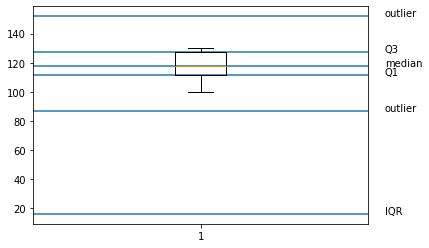

In [11]:
Q1 = df["m2"].quantile(0.25)
Q3 = df["m2"].quantile(0.75)
median=df["m2"].quantile(0.50)
IQR = Q3 - Q1
outlier1 = Q1 - 1.5 * IQR
outlier2= Q3 + 1.5 * IQR
          
Qs = [Q1, median, Q3, outlier1, outlier2,IQR]
Qname = ["Q1", "median", "Q3", "outlier", "outlier","IQR"]
for Q, name in zip(Qs, Qname):
       plt.axhline(Q)
       plt.text(1.55,Q, name)

plt.boxplot(df.m2,showfliers=False)